In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the MNIST Fashion dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 16s 8ms/step - loss: 0.7169 - accuracy: 0.7387 - val_loss: 0.4492 - val_accuracy: 0.8292
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.4688 - accuracy: 0.8298 - val_loss: 0.3826 - val_accuracy: 0.8602
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.4059 - accuracy: 0.8537 - val_loss: 0.3443 - val_accuracy: 0.8726
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3690 - accuracy: 0.8661 - val_loss: 0.3203 - val_accuracy: 0.8825
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3453 - accuracy: 0.8756 - val_loss: 0.3048 - val_accuracy: 0.8859
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3212 - accuracy: 0.8833 - val_loss: 0.2914 - val_accuracy: 0.8882
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3049 - accuracy: 0.8898 - val_loss: 0.2862 - val_accuracy: 0.8933
Epoch

313/313 [==============================] - 1s 4ms/step - loss: 0.2787 - accuracy: 0.8981
Test Loss: 0.2787059545516968
Test Accuracy: 0.8981000185012817


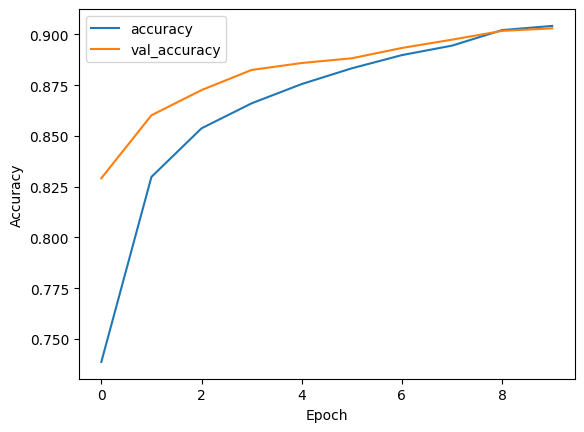

In [5]:

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()